In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.metrics import accuracy_score

In [10]:
#Data Collection and Processing 

In [11]:
#loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv("C:/Users/awele/Documents/Applied Stat/Data Science/heart.csv")

In [12]:
#print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
#print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [14]:
#number of rows and columns in the dataset
heart_data.shape

(1025, 14)

In [15]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [16]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


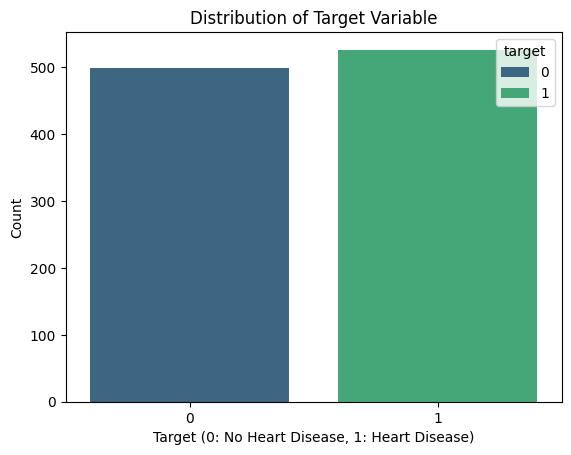

In [18]:
#checking the distribution of Target Variable
sns.countplot(x ='target', hue= 'target', data=heart_data, palette='viridis', dodge= False )
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: No Heart Disease, 1: Heart Disease)')
plt.ylabel('Count')
plt.show()

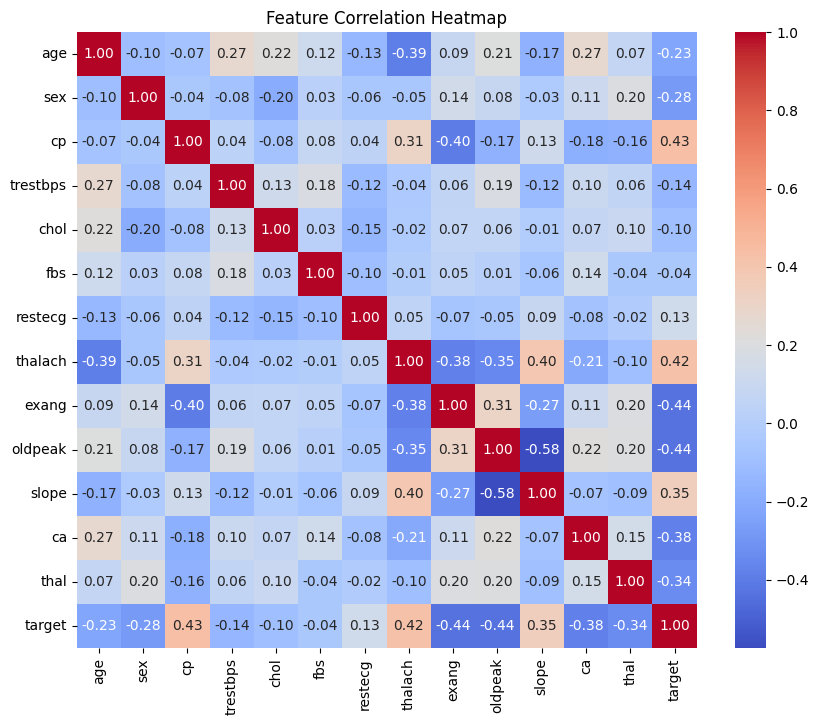

In [19]:
#Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


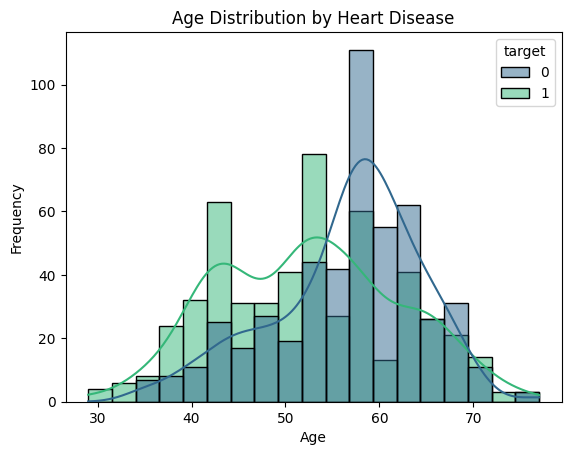

In [20]:
sns.histplot(data=heart_data, x='age', hue='target', kde=True, palette='viridis')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [21]:
#1--------> Defective heart
#0--------> Healthy heart

In [22]:
#Splitting the features and Target
X = heart_data.drop(columns='target',axis=1)

In [23]:
Y = heart_data['target']

In [24]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [25]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [26]:
#Splitting the data into train and test Data 

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [28]:
print(X.shape,X_train.shape,X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [29]:
#Model Training - Logistic regression 

In [30]:
#training the logistic regression model with training data

In [31]:
model = LogisticRegression(solver='liblinear', max_iter=500)

In [32]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [33]:
#Model Evaluation - Accuracy Score
#accuracy on training data

In [34]:
X_train_prediction = model.predict(X_train)

In [51]:
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [52]:
print('Accuracy on training data: ',training_data_accuracy)

Accuracy on training data:  0.8524390243902439


In [53]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [54]:
print('Accuracy on test data: ',test_data_accuracy)

Accuracy on test data:  0.8048780487804879


In [39]:
#Building a predictive system

In [40]:
input_data = (61,1,0,148,203,0,1,161,0,0,2,1,3)
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [41]:
#change the input data to a numpy array

In [42]:
input_data_as_numpy_array = np.asarray(input_data)

In [43]:
#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [44]:
# Convert input_data_reshaped to a DataFrame with the same column names as the training data
input_data_reshaped_df = pd.DataFrame(input_data_reshaped, columns= columns)

# Make a prediction with the reshaped input data
prediction = model.predict(input_data_reshaped_df)

# Print the prediction
print(prediction)

[0]


In [45]:
if (prediction[0]==0):
    print("The person does not have a heart disease")
else:
    print("The person has heart disease")


The person does not have a heart disease


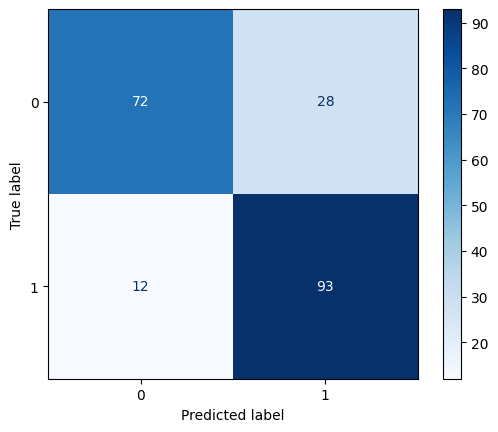

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_test contains actual labels and y_pred contains predicted labels
# Replace 'model' with the name of your trained logistic regression model
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
